In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings                                             # only to ignore python warnings
%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('Mumbai_99acers.csv')
data.head(3)

,sl no.,society,type,location,lattitude,longitude,bedrooms,built-up area,furnishing,age,...,dealer,posted,monthly rent,property photo,property video,society photo,society video,locality photo,locality video,description
0,1,Bandstand Apartment,Residential Apartment,Bandra (West),19.047353,72.820068,2 BHK,800.0,Furnished,5 to 10 years old,...,PROPBAY,Jul-05-2018,85000,2,0,3,0,0,0,Description : 2 bhk apartment for rent in band...
1,2,Fantastic Apartment,Residential Apartment,Khar West,19.071690,72.834127,2 BHK,1050.0,Furnished,1 to 5 years old,...,PROPBAY,Jul-05-2018,110000,0,0,0,0,1,0,Description : 2 bhk apartment for rent in khar...
2,3,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,19.109368,73.001346,2 BHK,1050.0,Unfurnished,1 to 5 years old,...,AAKASH REAL ESTATE,Jul-07-2018,32000,0,0,0,1,0,0,Description : 2 bhk flat available for rent in...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13541 entries, 0 to 13540
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl no.          13541 non-null  int64  
 1   society         13541 non-null  object 
 2   type            13541 non-null  object 
 3   location        13541 non-null  object 
 4   lattitude       2174 non-null   float64
 5   longitude       2174 non-null   float64
 6   bedrooms        13541 non-null  object 
 7   built-up area   13541 non-null  float64
 8   furnishing      13541 non-null  object 
 9   age             13541 non-null  object 
 10  floor           13541 non-null  object 
 11  total floors    13541 non-null  object 
 12  dealer          13478 non-null  object 
 13  posted          13541 non-null  object 
 14  monthly rent    13541 non-null  int64  
 15  property photo  13541 non-null  int64  
 16  property video  13541 non-null  int64  
 17  society photo   13541 non-null 

In [4]:
df = data.copy()

In [5]:
df = df.drop(df.iloc[:,[0,4,5,12,13,15,16,17,18,19,20,21]],axis = 1)
df.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,Bandstand Apartment,Residential Apartment,Bandra (West),2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,85000
1,Fantastic Apartment,Residential Apartment,Khar West,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,32000
3,Crescent Bay,Residential Apartment,Parel,3 BHK,2275.0,Semifurnished,1 to 5 years old,40th,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1 BHK,550.0,Semifurnished,5 to 10 years old,4th,7,27000


In [6]:
df.isnull().sum()

society          0
type             0
location         0
bedrooms         0
built-up area    0
furnishing       0
age              0
floor            0
total floors     0
monthly rent     0
dtype: int64

In [7]:
df.dtypes

society           object
type              object
location          object
bedrooms          object
built-up area    float64
furnishing        object
age               object
floor             object
total floors      object
monthly rent       int64
dtype: object

In [8]:
for i in df.columns.drop(['built-up area','monthly rent']):
    df[i] = df[i].apply(lambda x: x.strip())

In [9]:
df.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,Bandstand Apartment,Residential Apartment,Bandra (West),2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,85000
1,Fantastic Apartment,Residential Apartment,Khar West,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,32000
3,Crescent Bay,Residential Apartment,Parel,3 BHK,2275.0,Semifurnished,1 to 5 years old,40th,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1 BHK,550.0,Semifurnished,5 to 10 years old,4th,7,27000


In [10]:
society_count = pd.DataFrame(df['society'].value_counts())
society_count

,society
On Request,1219
Lodha New Cuffe Parade,279
Lodha Lakeshore Greens,186
Crescent Bay,162
Ajmera Bhakti Park Sector 1 and 2,160
...,...
Haware Tilak Nagar,1
Shree Laxmi Park 1,1
Gulmohar House,1
Worli Sea Face,1


In [11]:
society_count[society_count['society']<10].shape

(3292, 1)

In [12]:
society_count_less_than_10_index_list = society_count[society_count['society']<10].index
df['society'] = df['society'].apply(lambda x: 'other society' if x in society_count_less_than_10_index_list else x)

In [13]:
df['society'].value_counts()

other society                                5554
On Request                                   1219
Lodha New Cuffe Parade                        279
Lodha Lakeshore Greens                        186
Crescent Bay                                  162
                                             ... 
Kesar Harmony                                  10
Safal Saraswati CHS                            10
Harmony Co Operative Housing Society           10
Oberoi Parkview                                10
Hiranandani Estate, Patlipada, Thane West      10
Name: society, Length: 182, dtype: int64

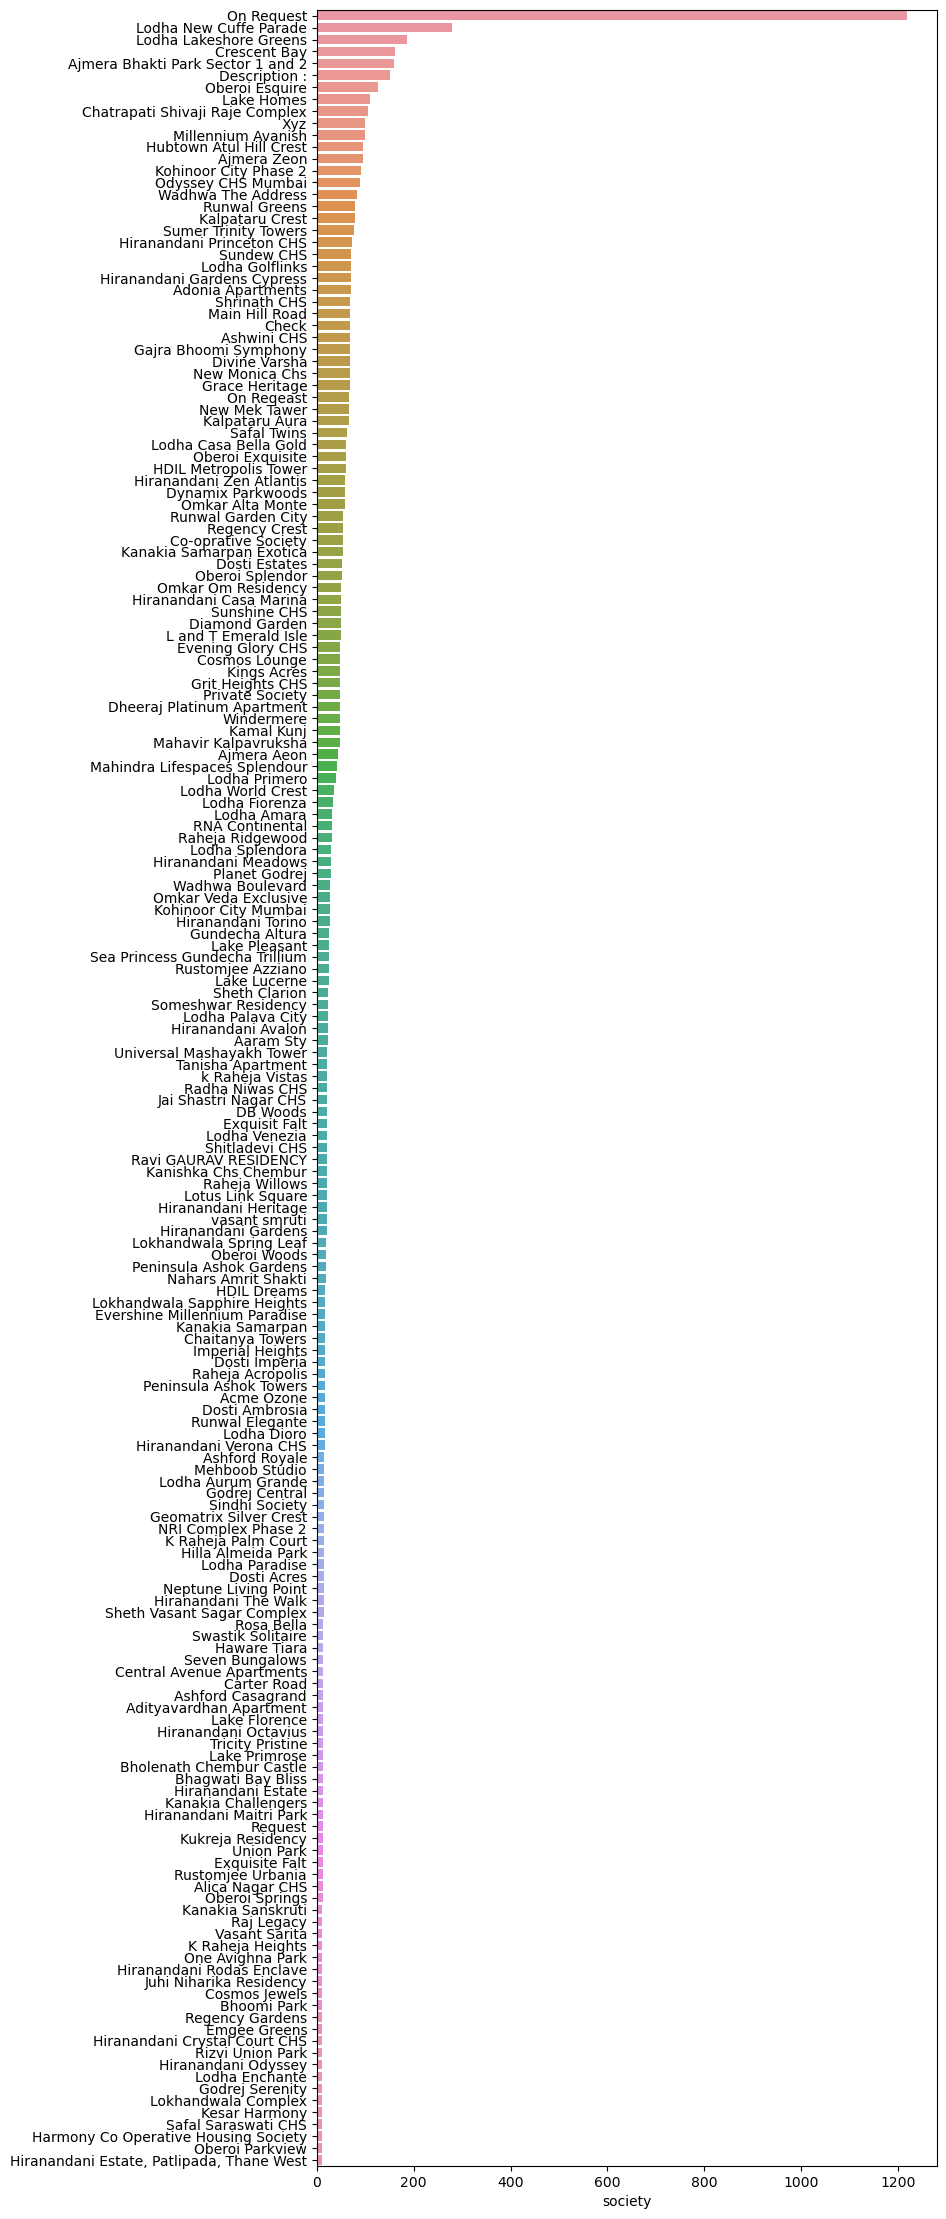

In [14]:
sc = pd.DataFrame(df['society'].value_counts().iloc[1:,])

plt.figure(figsize=(8,28))
sns.barplot(x = 'society', y = sc.index, data=sc)
plt.show()

In [15]:
df['type'].value_counts()

Residential Apartment      13416
Studio Apartment              69
Independent House/Villa       56
Name: type, dtype: int64

In [16]:
location_count = pd.DataFrame(df['location'].value_counts())
location_count

,location
Bandra (West),571
Wadala,497
Hiranandani Gardens - Powai,463
Wadala East,458
Chembur (East),449
...,...
Sonar Pada,1
"Old Mhb, Gorai Road, Borivali West",1
Parsee Colony,1
Lourdes Colony,1


In [17]:
location_count_less_than_10_index = location_count[location_count['location']<10].index
df['location'] = df['location'].apply(lambda x: 'other location' if x in location_count_less_than_10_index else x)

In [18]:
df['location'].value_counts()

other location                 1003
Bandra (West)                   571
Wadala                          497
Hiranandani Gardens - Powai     463
Wadala East                     458
                               ... 
Hmpl Surya Nagar                 11
4 Bunglows                       10
Dindoshi                         10
Sindhi Society Chembur           10
Sector-6 Nerul                   10
Name: location, Length: 166, dtype: int64

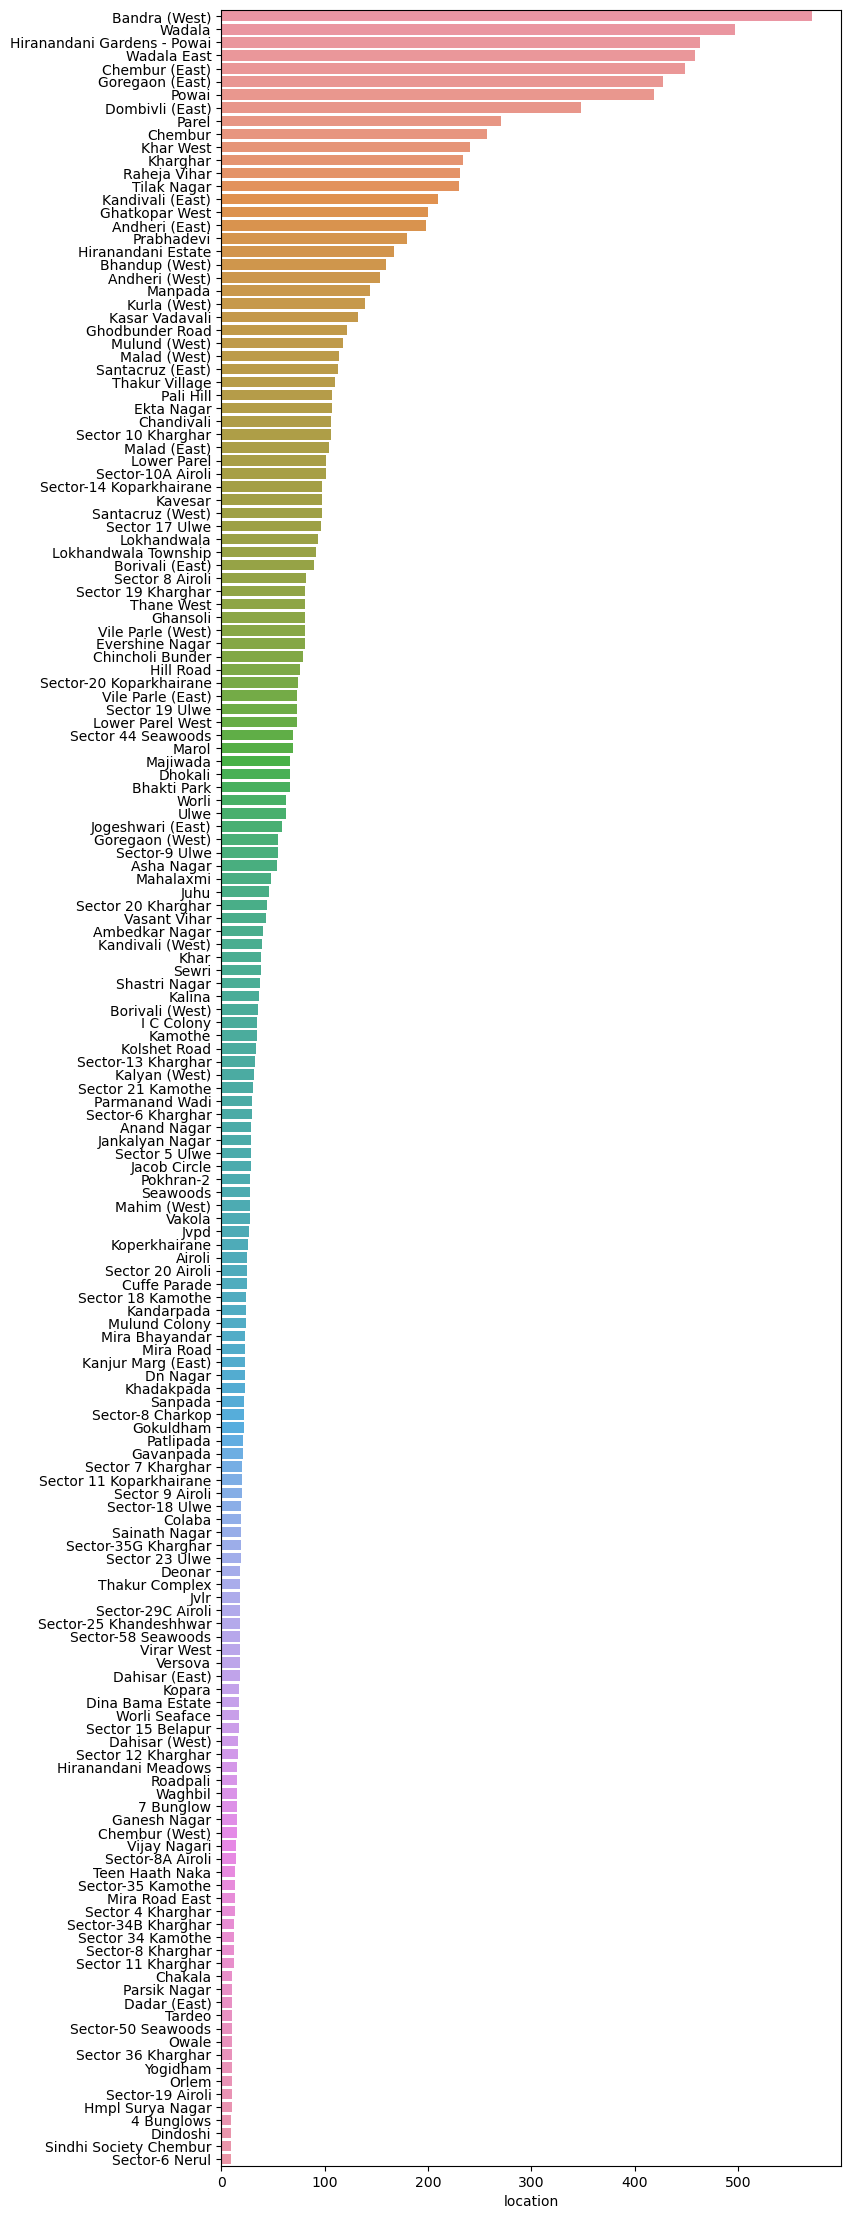

In [19]:
location_count = pd.DataFrame(df['location'].value_counts().iloc[1:,])

plt.figure(figsize=(8,28))
sns.barplot(x = 'location', y = location_count.index, data=location_count)
plt.show()

In [20]:
df.furnishing.value_counts()

Semifurnished    5661
Unfurnished      4272
Furnished        3395
Not Mentioned     213
Name: furnishing, dtype: int64

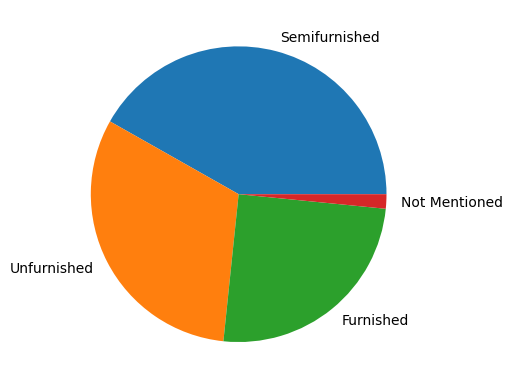

In [21]:
plt.pie(df.furnishing.value_counts(), labels = df.furnishing.value_counts().index)
plt.show()

In [22]:
df.age.value_counts()

1 to 5 years old     4783
5 to 10 years old    4002
0 to 1 years old     2680
10+ years old        2030
Not Mentioned          46
Name: age, dtype: int64

In [23]:
df['bedrooms'].value_counts()

2 BHK        6392
3 BHK        3447
1 BHK        2906
4 BHK         620
1 RK           69
5 BHK          46
4 Bedroom      22
1 Bedroom      12
2 Bedroom       8
3 Bedroom       7
6 BHK           5
5 Bedroom       4
7 Bedroom       2
9 Bedroom       1
Name: bedrooms, dtype: int64

In [24]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: x.strip(' ')[0])
df['bedrooms'].value_counts()

2    6400
3    3454
1    2987
4     642
5      50
6       5
7       2
9       1
Name: bedrooms, dtype: int64

In [25]:
df[df['type'] == 'Independent House/Villa']

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1360,Union Park,Independent House/Villa,Chembur,2,935.0000,Unfurnished,1 to 5 years old,Not Mentioned,Not Mentioned,44000
1606,other society,Independent House/Villa,Lokhandwala,4,2500.0000,Semifurnished,5 to 10 years old,Not Mentioned,Not Mentioned,250000
1646,other society,Independent House/Villa,other location,4,41548.6540,Semifurnished,0 to 1 years old,Not Mentioned,Not Mentioned,310000
1788,Description :,Independent House/Villa,Juhu,4,3500.0000,Not Mentioned,5 to 10 years old,Not Mentioned,Not Mentioned,400000
1901,On Request,Independent House/Villa,Sector-8 Charkop,1,250.0000,Unfurnished,10+ years old,Not Mentioned,Not Mentioned,10500
2122,On Request,Independent House/Villa,Juhu,4,3300.0000,Furnished,5 to 10 years old,Not Mentioned,Not Mentioned,450000
2124,other society,Independent House/Villa,other location,1,269.0975,Unfurnished,0 to 1 years old,Not Mentioned,Not Mentioned,7500
2175,other society,Independent House/Villa,other location,4,3229.1700,Semifurnished,1 to 5 years old,Not Mentioned,Not Mentioned,125000
2340,other society,Independent House/Villa,Chembur,4,2500.0000,Furnished,1 to 5 years old,Not Mentioned,Not Mentioned,84000
2377,Description :,Independent House/Villa,Kharghar,2,4520.8380,Not Mentioned,10+ years old,Not Mentioned,Not Mentioned,25000


In [26]:
type_index_list = df[df['type'] == 'Independent House/Villa'].index

for i in type_index_list:
    df['floor'][i] = 0
    df['total floors'][i] = 0

In [27]:
df['floor'].unique()

array(['2nd', '8th', '14th', '40th', '4th', '3rd', '19th', '11th', '1st',
       '6th', '5th', '12th', '20th', '10th', '7th', '16th', '13th',
       'Ground', 'Not Mentioned', '24th', '34th', '25th', '9th', '33rd',
       '35th', '18th', '15th', '21st', 'ried', '40+', '36th', '17th',
       '30th', '38th', '22nd', 0, '27th', '28th', '26th', '23rd', '32nd',
       '29th', '37th', '31st', '39th'], dtype=object)

In [28]:
df.replace({'floor': ['Ground','ried']}, 0, inplace =True)
df.replace({'floor': '40+'},41, inplace =True)
df.replace({'floor': 'Not Mentioned'}, np.NaN, inplace =True)
df = df.replace({'floor': '[A-Za-z]'}, ' ', regex = True)
df['floor'] = df['floor'].astype(str)
df['floor'] = df['floor'].apply(lambda x: x.strip())
df = df.dropna()

In [29]:
df = df.drop(df[df['floor']=='nan'].index, axis=0)
df['floor'].unique()

array(['2', '8', '14', '40', '4', '3', '19', '11', '1', '6', '5', '12',
       '20', '10', '7', '16', '13', '0', '24', '34', '25', '9', '33',
       '35', '18', '15', '21', '41', '36', '17', '30', '38', '22', '27',
       '28', '26', '23', '32', '29', '37', '31', '39'], dtype=object)

In [30]:
df['total floors'].unique()

array(['6', '12', '17', '41', '7', '19', '30', '23', '24', '8', '18', '4',
       '11', '14', '22', '10', '3', '39', '35', '20', '21', '40', '13',
       '15', '32', '33', '36', '16', '5', '37', '38', '27', '9', '26',
       '25', '28', 0, '34', '29', '59', '46', '31', '2', 'Not Mentioned',
       '45', '48', '42', '1', '60', '55', '52', '58'], dtype=object)

In [31]:
(df['total floors'] == 'Not Mentioned').sum()

4

In [32]:
df[df['total floors'] == 'Not Mentioned']

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1946,other society,Residential Apartment,Bandra (West),2,1200.0,Furnished,0 to 1 years old,3,Not Mentioned,90000
10130,Hilla Almeida Park,Residential Apartment,Bandra (West),2,1200.0,Furnished,10+ years old,3,Not Mentioned,90000
10131,other society,Residential Apartment,Bandra (West),2,1150.0,Furnished,10+ years old,4,Not Mentioned,85000
10187,other society,Residential Apartment,Bandra (West),3,2000.0,Semifurnished,0 to 1 years old,5,Not Mentioned,120000


In [33]:
df.replace({'total floors': 'Not Mentioned'}, np.NaN, inplace = True)
df = df.dropna()

In [34]:
df['total floors'].unique()

array(['6', '12', '17', '41', '7', '19', '30', '23', '24', '8', '18', '4',
       '11', '14', '22', '10', '3', '39', '35', '20', '21', '40', '13',
       '15', '32', '33', '36', '16', '5', '37', '38', '27', '9', '26',
       '25', '28', 0, '34', '29', '59', '46', '31', '2', '45', '48', '42',
       '1', '60', '55', '52', '58'], dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13369 entries, 0 to 13539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   society        13369 non-null  object 
 1   type           13369 non-null  object 
 2   location       13369 non-null  object 
 3   bedrooms       13369 non-null  object 
 4   built-up area  13369 non-null  float64
 5   furnishing     13369 non-null  object 
 6   age            13369 non-null  object 
 7   floor          13369 non-null  object 
 8   total floors   13369 non-null  object 
 9   monthly rent   13369 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [36]:
#At last convert all columns contains numerals into integer datatype
df['bedrooms'] = df['bedrooms'].astype(int)
df['floor'] = df['floor'].astype(int)
df['total floors'] = df['total floors'].astype(int)

In [37]:
df.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,27000


In [38]:
def plot_num(df, columns):
  data = df

  for column in columns:
      plt.figure(figsize=(16,4))

      plt.subplot(1,3,1)
      sns.histplot(data[column], kde=True)
      plt.title(f'{column}  Distribution')

      plt.subplot(1,3,2)
      sns.boxplot(y = data[column], showmeans=True)
      plt.title(f'{column}  Distribution')

      plt.subplot(1,3,3)
      counts, bins = np.histogram(data[column])
      cdf = np.cumsum (counts)
      plt.plot (bins[1:], cdf/cdf[-1])
      plt.yticks(np.arange(0,1.05,.05))
      plt.title(f'{column}  cdf')
      plt.show()

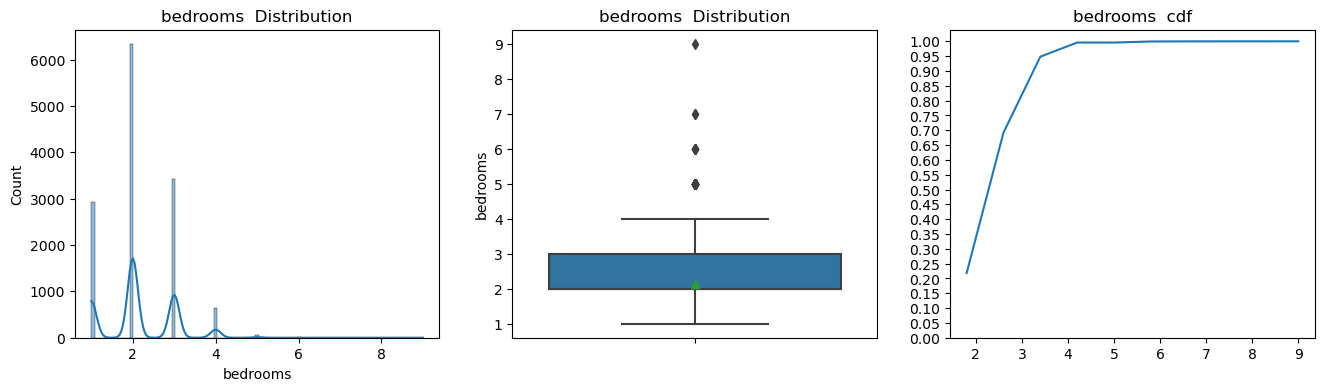

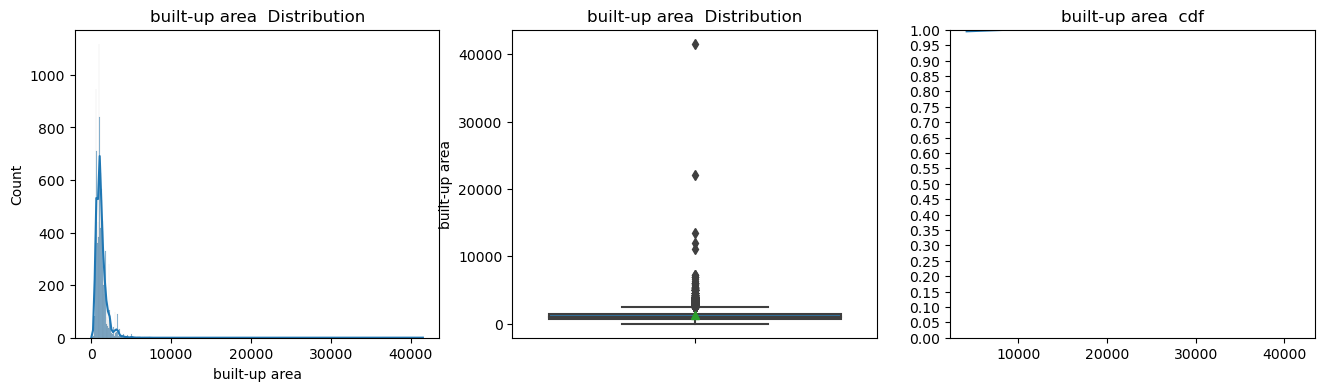

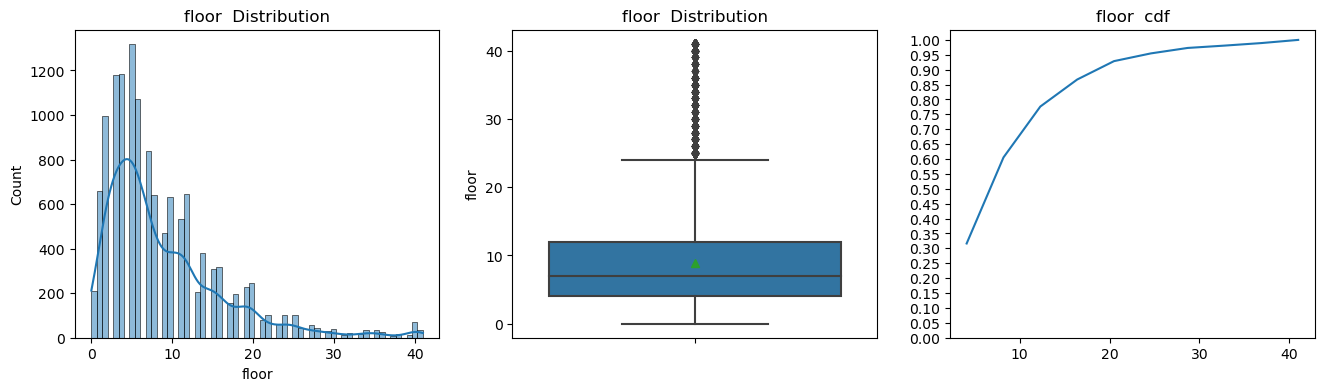

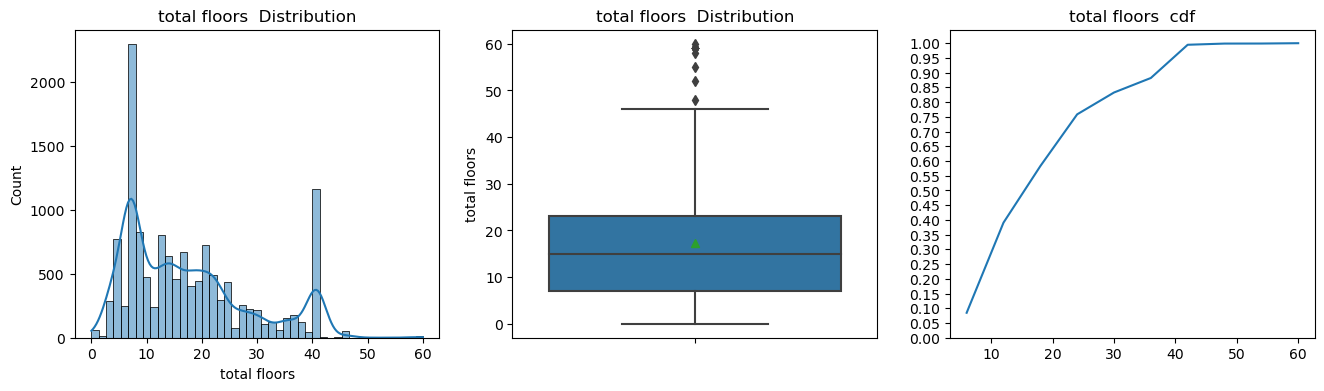

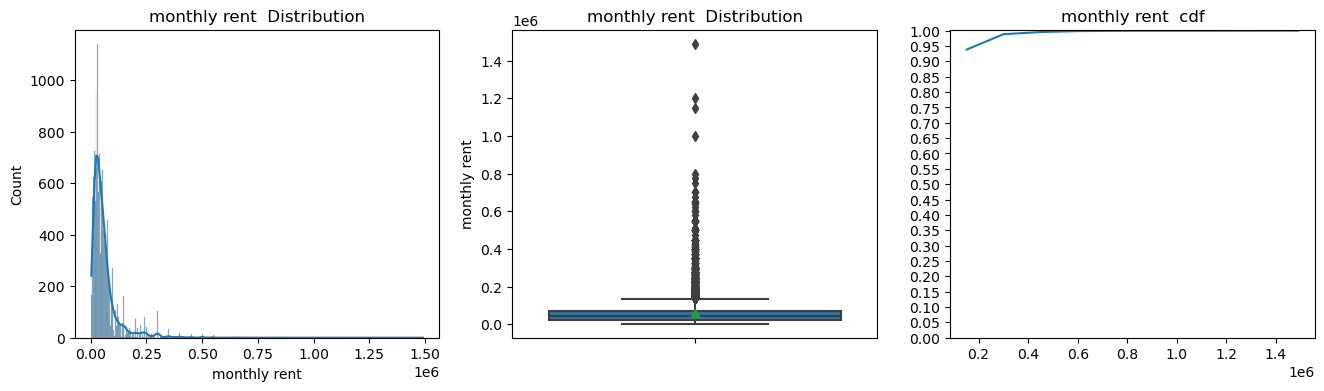

In [39]:
int_columns = df.columns[df.dtypes!='object']
plot_num(df,int_columns)

In [40]:
# Quantiles
for column in int_columns:
    print(f'For {column}:')

    print('3º Quartile:', df[column].quantile(q = 0.75))
    print('95 Quantile:', df[column].quantile(q = 0.95))
    print('Max:', df[column].quantile(q = 1.00),'\n')

For bedrooms:
3º Quartile: 3.0
95 Quantile: 4.0
Max: 9.0 

For built-up area:
3º Quartile: 1450.0
95 Quantile: 2400.0
Max: 41548.654 

For floor:
3º Quartile: 12.0
95 Quantile: 24.0
Max: 41.0 

For total floors:
3º Quartile: 23.0
95 Quantile: 41.0
Max: 60.0 

For monthly rent:
3º Quartile: 70000.0
95 Quantile: 180000.0
Max: 1490000.0 



In [42]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: x if x<5 else 5)
df['total floors'] = df['total floors'].apply(lambda x: x if x<41 else 41)

In [43]:
df['built-up area'].quantile(q = 0.99)

3500.0

In [44]:
df.drop(df[df['built-up area']>3500].index, axis=0, inplace=True)

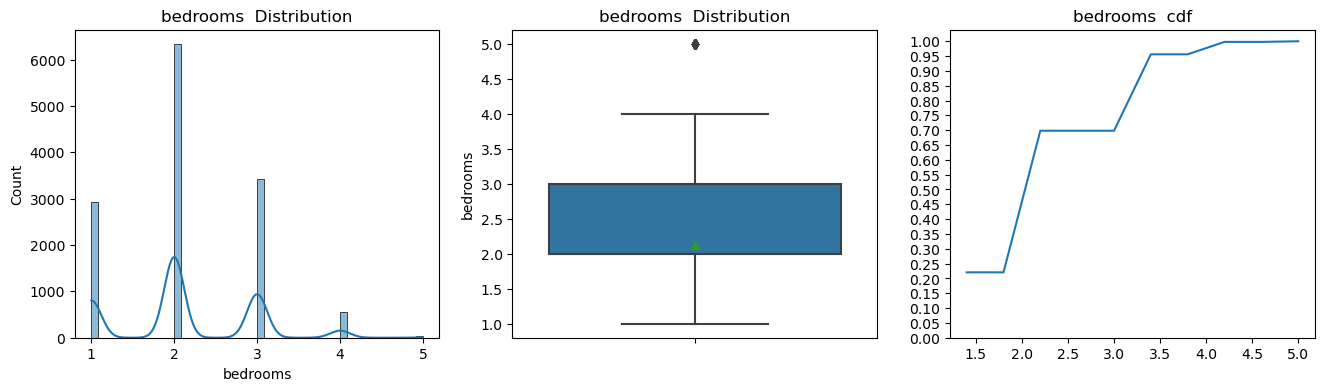

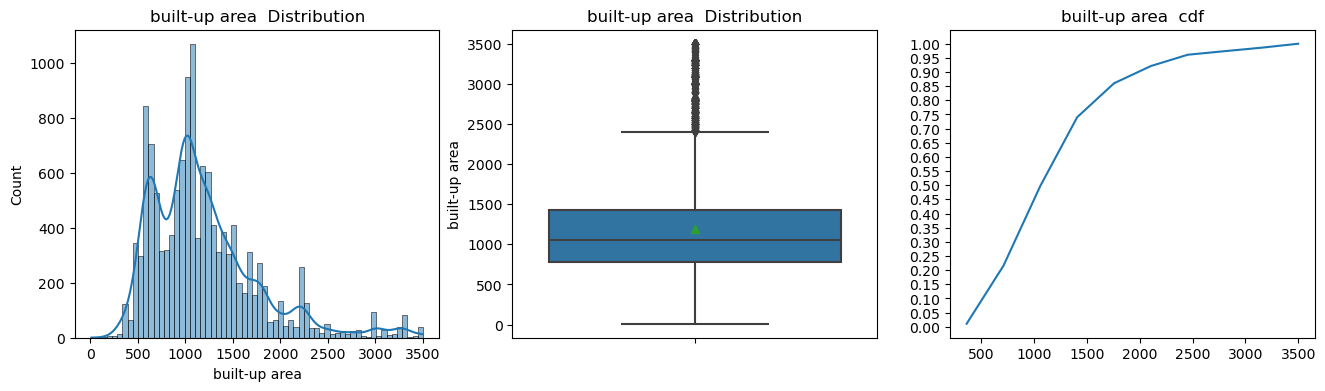

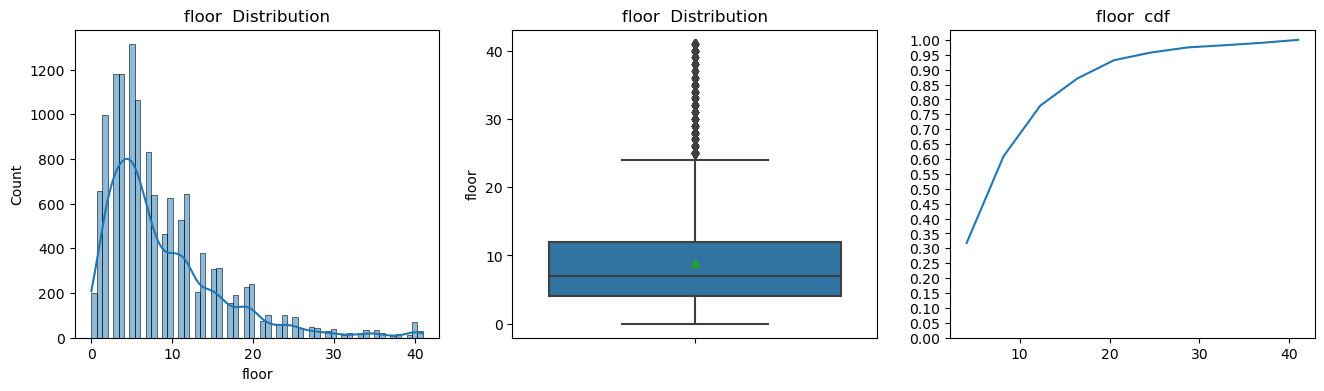

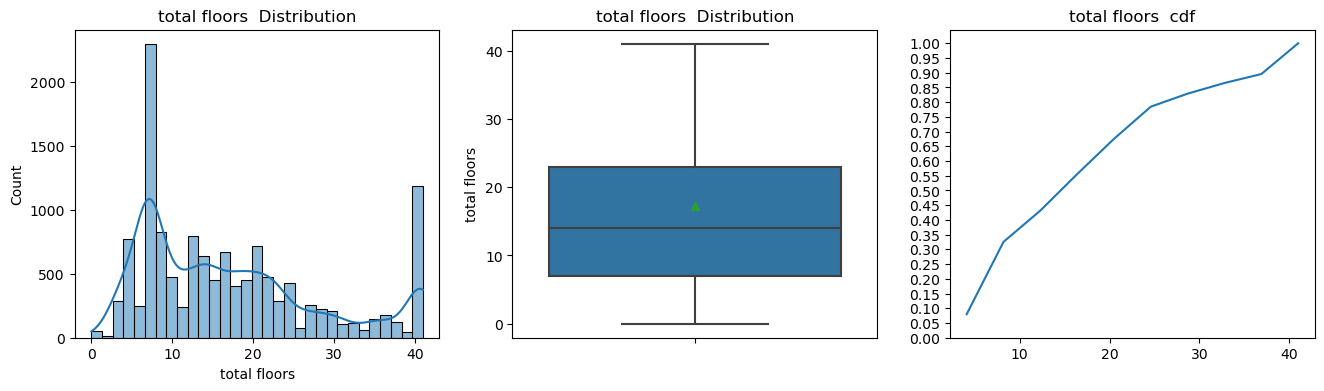

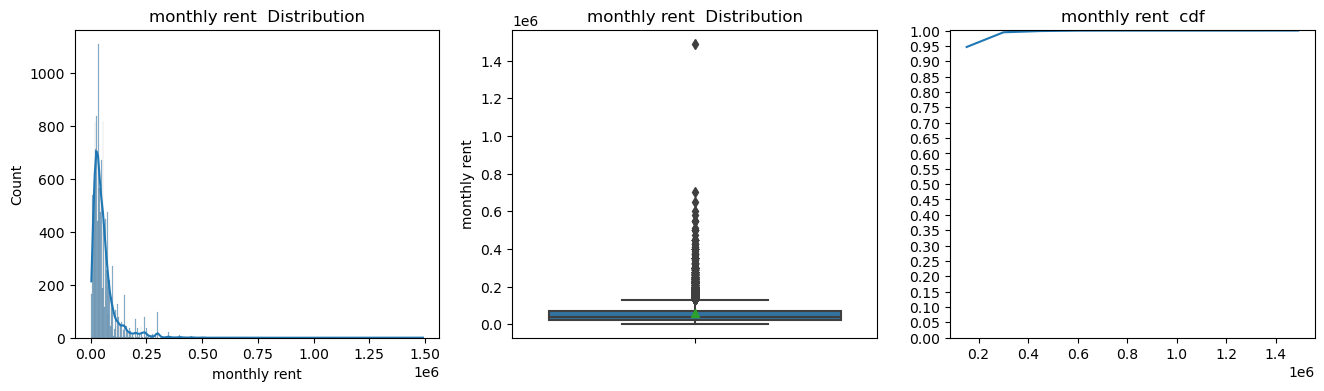

In [45]:
int_columns = df.columns[df.dtypes!='object']
plot_num(df, int_columns)

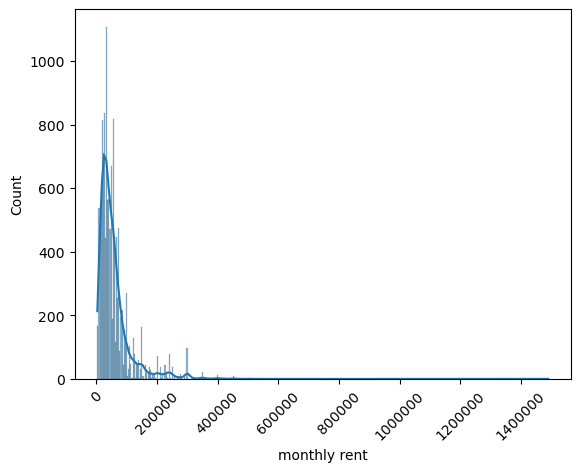

In [46]:
sns.histplot(df['monthly rent'], kde=True)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

In [47]:
print('95th', df['monthly rent'].quantile(q = 0.95))
print('97th', df['monthly rent'].quantile(q = 0.97))
print('99th', df['monthly rent'].quantile(q = 0.99))

95th 160000.0
97th 220000.0
99th 300000.0


In [48]:
df.drop(df[df['monthly rent']>200000].index, axis=0, inplace=True)

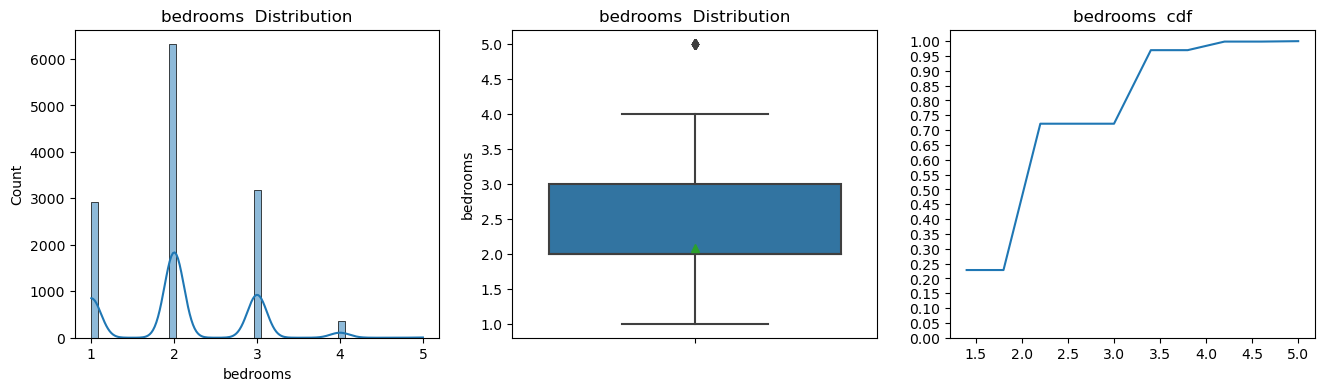

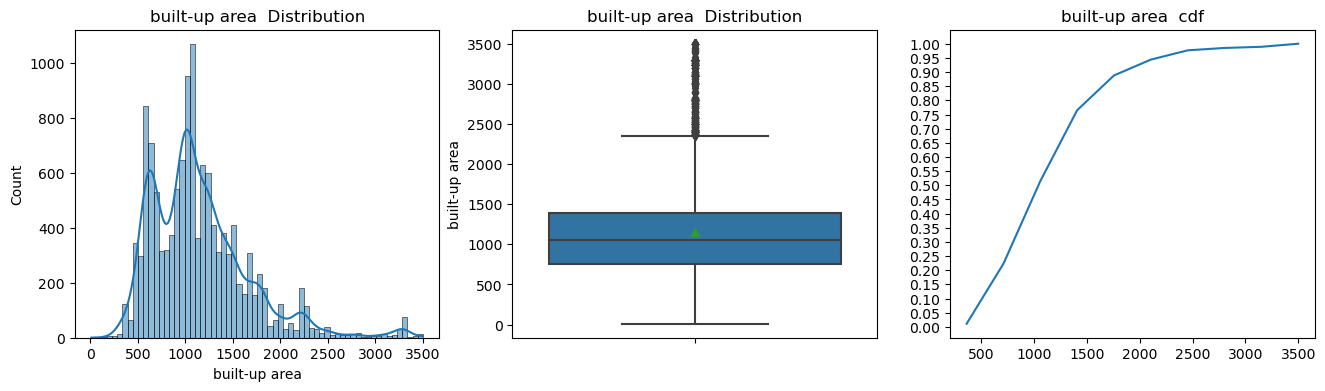

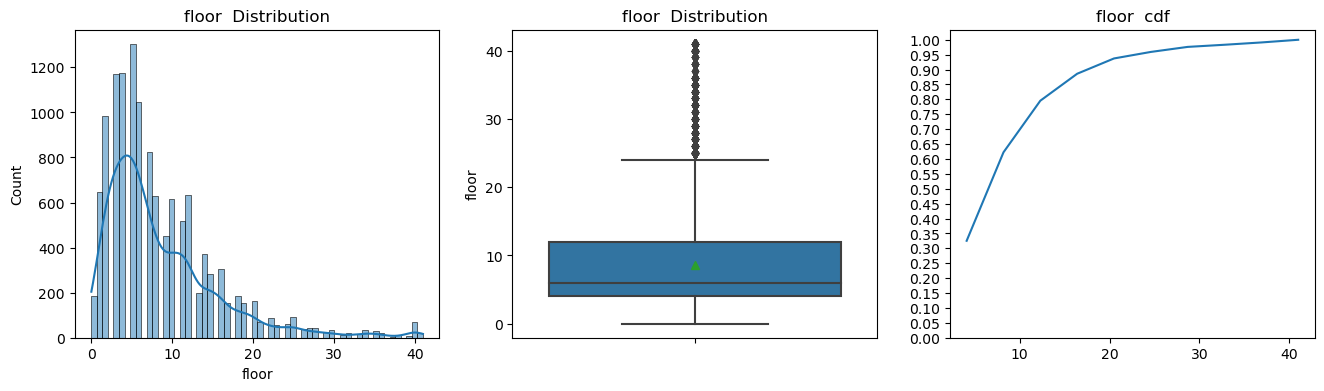

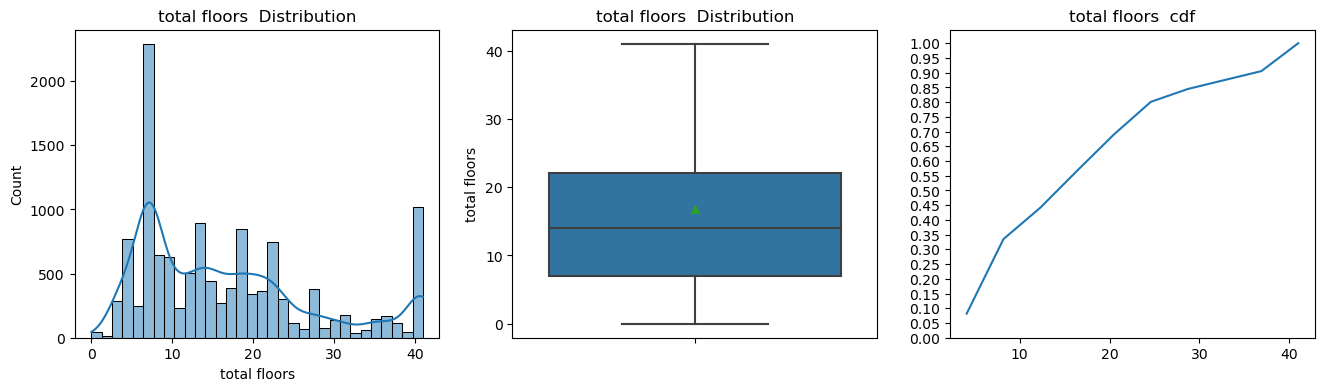

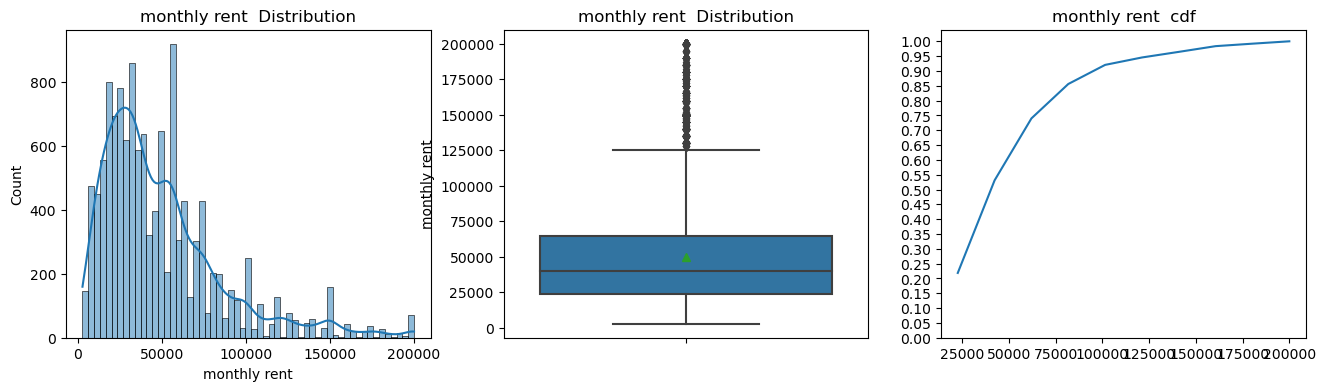

In [49]:
int_columns = df.columns[df.dtypes!='object']
plot_num(df, int_columns)

In [50]:
df

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,27000
...,...,...,...,...,...,...,...,...,...,...
13535,other society,Residential Apartment,Prabhadevi,3,2529.0,Furnished,1 to 5 years old,12,32,175000
13536,Runwal Greens,Residential Apartment,Mulund (West),3,1382.0,Semifurnished,0 to 1 years old,27,40,48000
13537,other society,Residential Apartment,other location,3,1750.0,Unfurnished,10+ years old,9,16,200000
13538,other society,Residential Apartment,Sector 19 Kharghar,2,950.0,Semifurnished,5 to 10 years old,8,10,25500


In [51]:
df.to_csv('Mumbai_99acers_cleaned.csv', index=False)

In [52]:
df1 = df.copy()
int_columns = df1.columns[df1.dtypes!='object']

for column in int_columns:
  df1[column] = df1[column].apply(lambda x: np.log(x) if x!=0 else x)

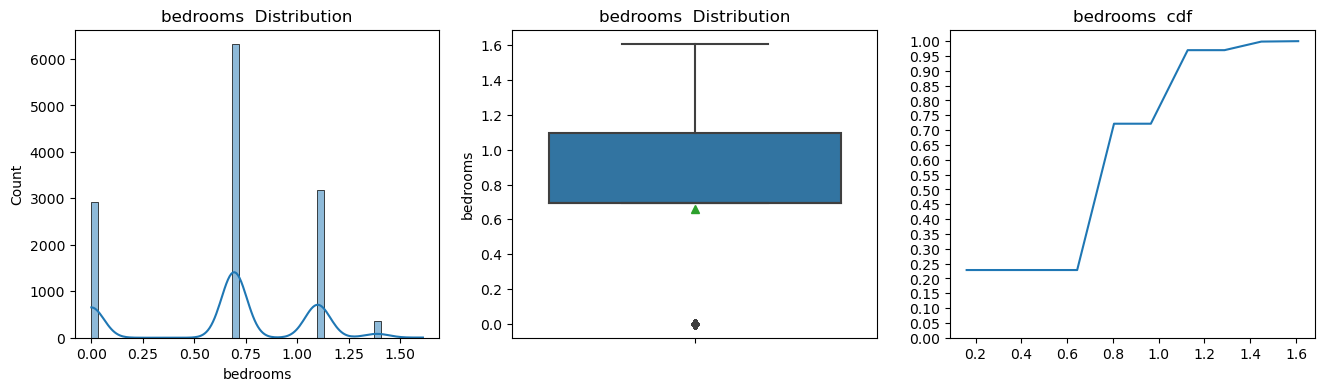

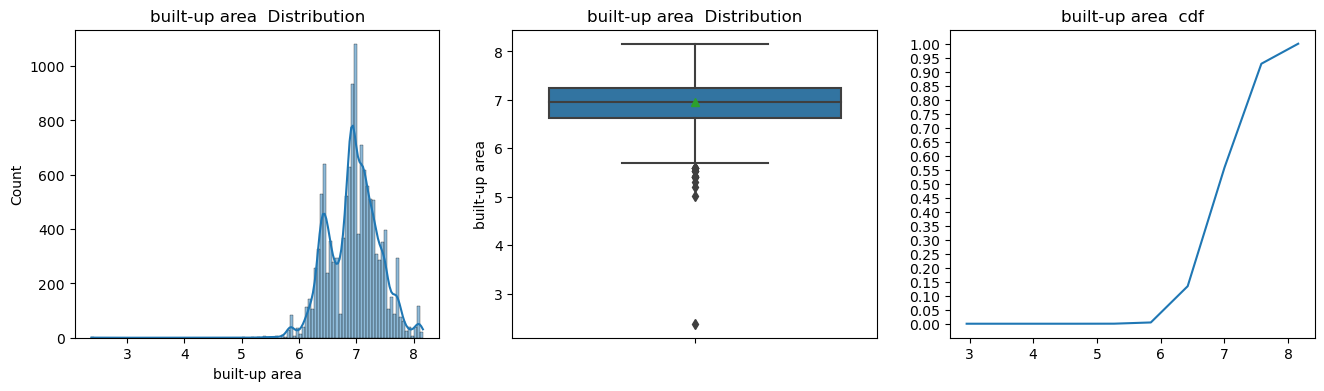

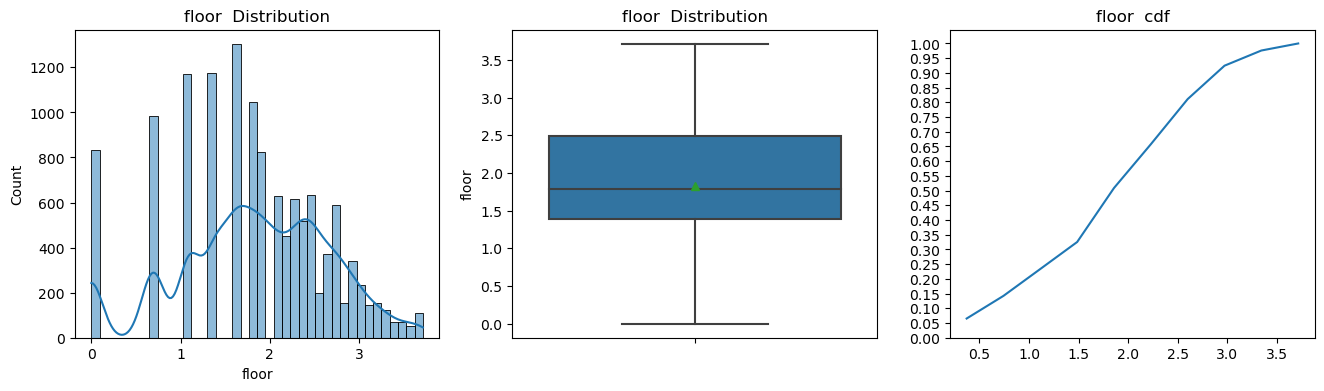

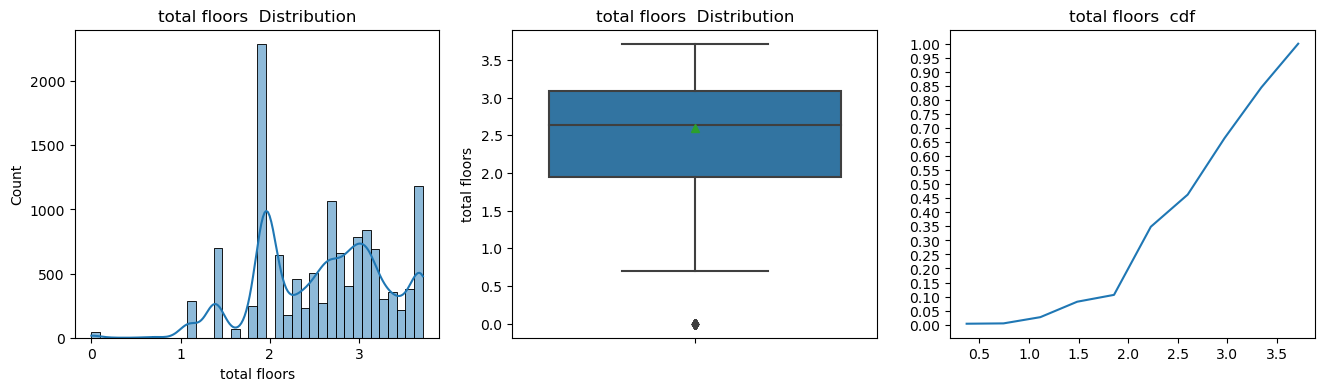

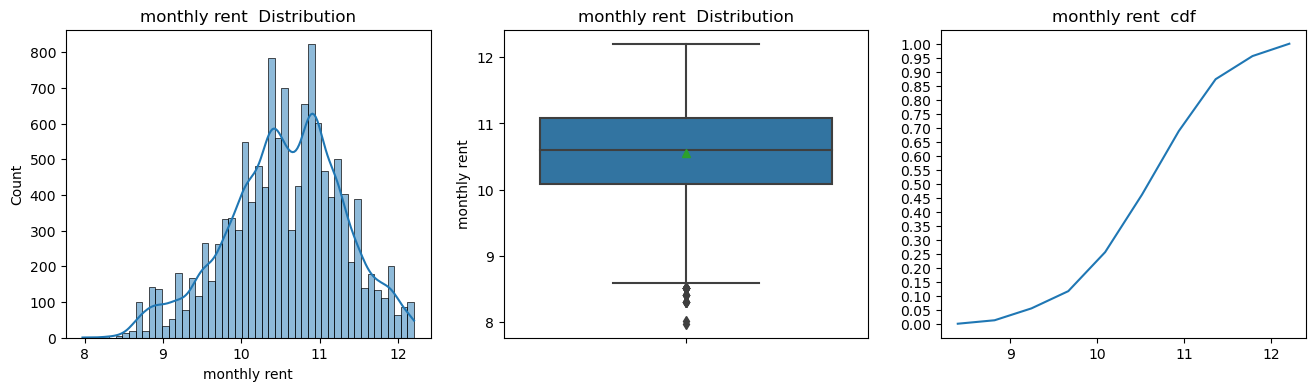

In [53]:
plot_num(df1,int_columns)

In [54]:
df['monthly rent'] = df['monthly rent'].apply(np.log)

In [55]:
df.to_csv('Mumbai_99acers_logtransformed.csv', index=False)